# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 
 So Cars 4U can set up as a major player in the highly growing used car market in India 

### **The objective:**

 - What is the intended goal?
 
 To come up wuth a pricing model that will make help the company be profitable as it can be

### **The key questions:**

- What are the key questions that need to be answered?

How should we price a car based on owners, age, Kms, etc. 
Do other performance features like Engine and Power play a role in pricing 
Does the type of car play a role in the pricing too.

### **The problem formulation**:

- What is it that we are trying to solve using data science?

What is the value of a car based on certain characteristics i.e. the fields below 


### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
#Load of Data
data=pd.read_csv('used_cars.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
#Preview the Data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# Check the datatypes of each column, number of entries, and null vales
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


Observations and Insights: 

There are 7253 rows in our data set.

S.no. column is just a index number, so it will not be needed 

Price and new price have missing values with new price having roughly 6/7 entries null.

Transmission have 2 values (automatic and manual). 

Name, location, Fuel_type, Transmission, and Owner_Type are objects. 


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [5]:
## get a statisical analysis of the Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


Observations and Insights: 
  
Years columns shows that these are cars that were built betwween 1996 and 2019.

Kilometers_Driven have a huge variation wih 6500000 km driven which could be a misprint and a min of 171. But 25-75% of the cars lie between 34000 and 73000 KM driven 

Mileage has min value of 0 which could be a misprint everthing else looks fine

Engine has 25%-75% values being in range of 1198 to 1968. This shows that most of the cars have mid size engines. A a car with a the 72 engine value seems very low with the manufacturing years of the cars.

The are cars that have 2 seats which could be coupe. 5 seat cars are common ones which makes sense. A 10 seat car could be a van. 

new price has huge variation between min and max values which can be guessed from the performance, brand, and type of car. 



In [6]:
# Explore basic summary statistics of categorical variables.
objcols = data.select_dtypes(include = ['object']).columns

for c in objcols:
    
    print("For column:", c)
    
    print(data[c].describe())
    
    print('-'*50)

For column: Name
count                       7253
unique                      2041
top       Mahindra XUV500 W8 2WD
freq                          55
Name: Name, dtype: object
--------------------------------------------------
For column: Location
count       7253
unique        11
top       Mumbai
freq         949
Name: Location, dtype: object
--------------------------------------------------
For column: Fuel_Type
count       7253
unique         5
top       Diesel
freq        3852
Name: Fuel_Type, dtype: object
--------------------------------------------------
For column: Transmission
count       7253
unique         2
top       Manual
freq        5204
Name: Transmission, dtype: object
--------------------------------------------------
For column: Owner_Type
count      7253
unique        4
top       First
freq       5952
Name: Owner_Type, dtype: object
--------------------------------------------------


Observations and Insights:  

Names have many unique values with few repetions with  Mahindra XUV500 W8 2WD being most repeated value at 55 times.

Location have few unique values only 11 which means that the company dealing with used cars is only currently present in 11 cities, out of which Mumbai has most cars up for sale.

Fuel type has only 5 unique values with diesel having  maximum frequency.

Transmission has only 2 unique values, most cars are manual.

Owner type has 4 unique values which can be first second third and fourth, among them first is most common. 


In [7]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven' since there was an extreme value there which might be misprint
data.sort_values(by='Kilometers_Driven',ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


That 6500000 KM values doesn't make any sense for a car built in 2017, so it is safe to the drop the value since it is a data entry error 

In [8]:
# Removing the 'row' at index 2328 from the data
data.drop(index=2328,inplace=True)
data.sort_values(by='Kilometers_Driven',ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00
6919,6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN


It is odd for used cars to have mileage of zero, check to make sure it is not an error 

In [9]:
## check for zero values to see error or not
data.sort_values(by='Mileage').head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


A lot of cars have 0 mileage, 0 could be a filler for null values. 

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [10]:
##This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot_maker(field, figsize = (15, 10), bins = None):
        
    f2, (abox, ahist) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(field, x = abox, showmeans = True, color = 'violet')
    
    sns.distplot(field, kde = F, x = ahist, bins = bins, palette = "winter") if bins else sns.distplot(field, kde = False, ax = ahist)
    
    ahist.axvline(np.mean(field), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ahist.axvline(np.median(field), color = 'black', linestyle = '-') # Add median to the histogram

skewness of S.No. is : -0.00022364075468205203
skewness of Year is : -0.8397050406997638
skewness of Kilometers_Driven is : 3.832545848818344
skewness of Mileage is : -0.43849302953596925
skewness of Engine is : 1.413133430829896
skewness of Power is : 1.9624262822569614
skewness of Seats is : 1.9548877812669965
skewness of New_price is : 4.128299677490268
skewness of Price is : 3.337576076530038


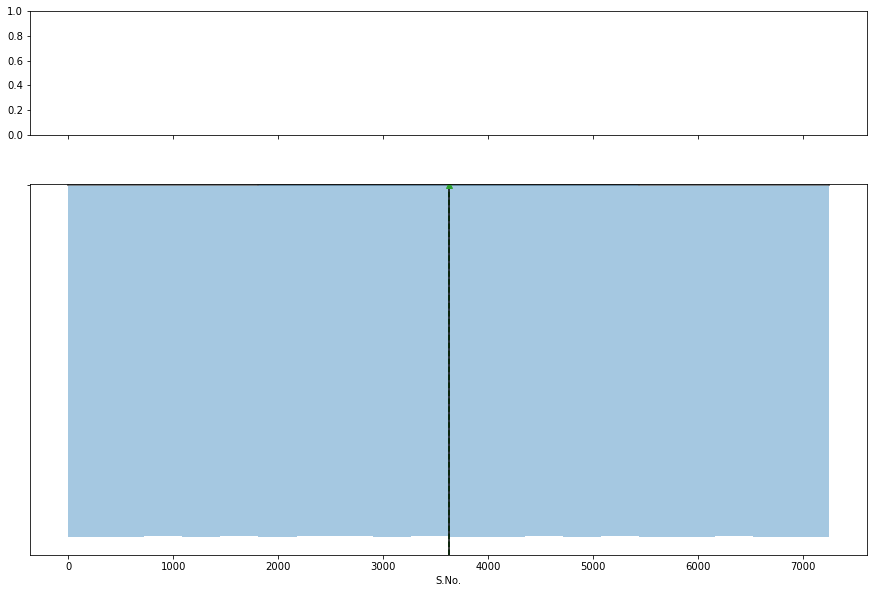

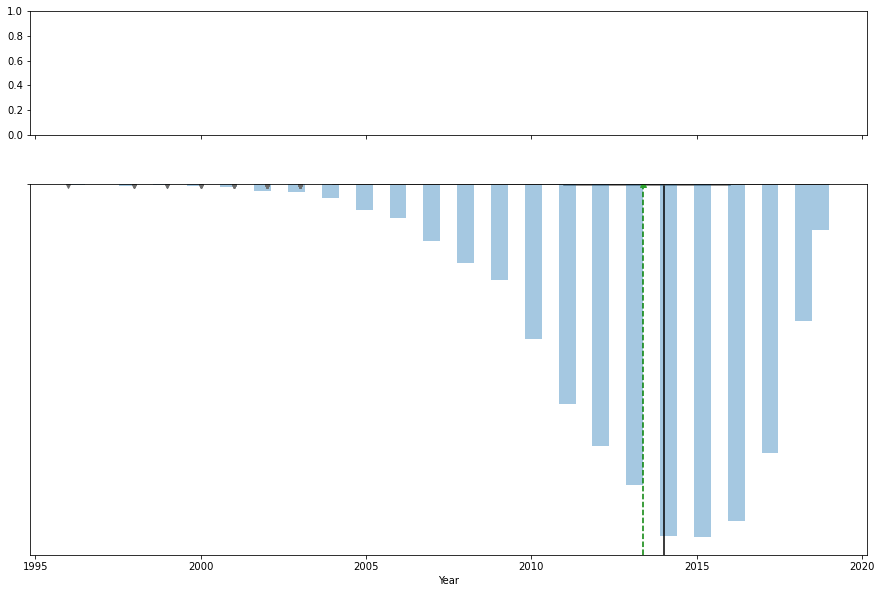

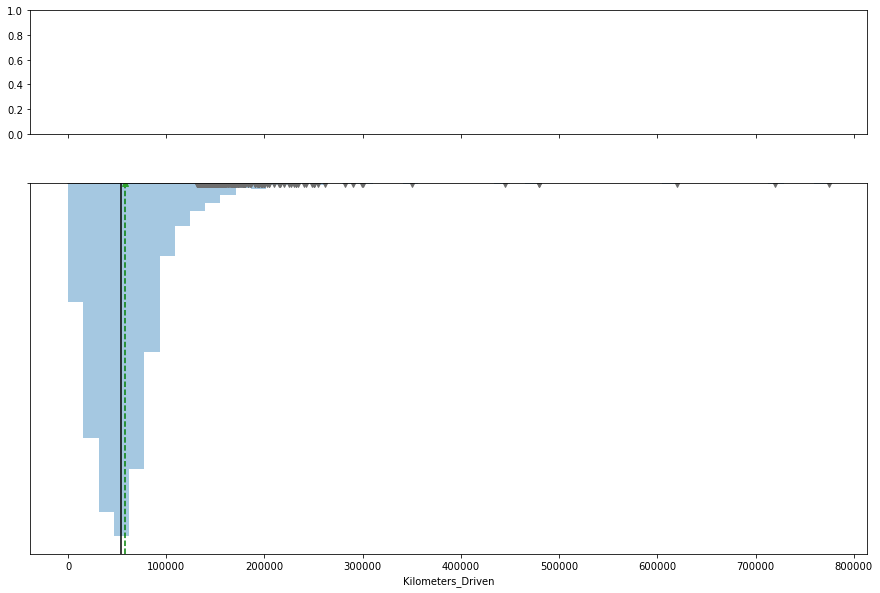

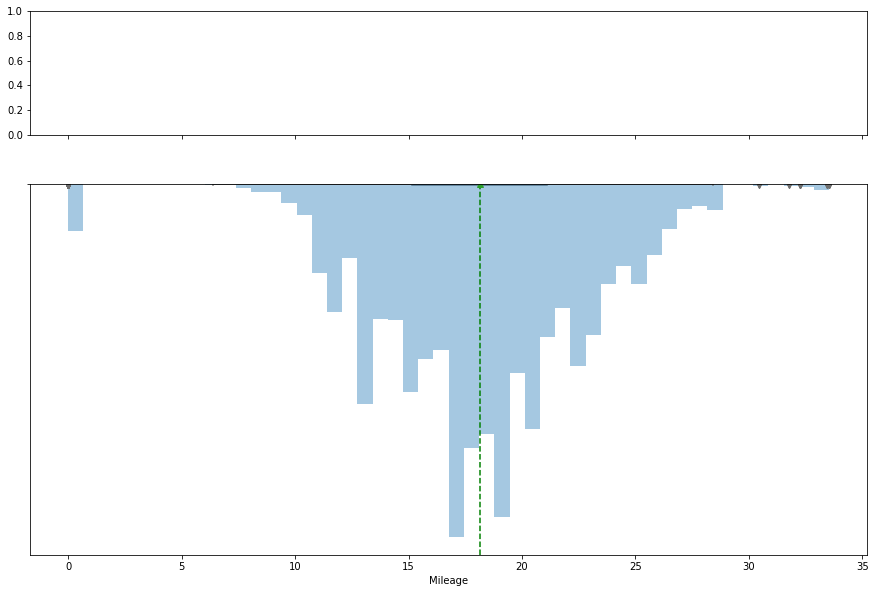

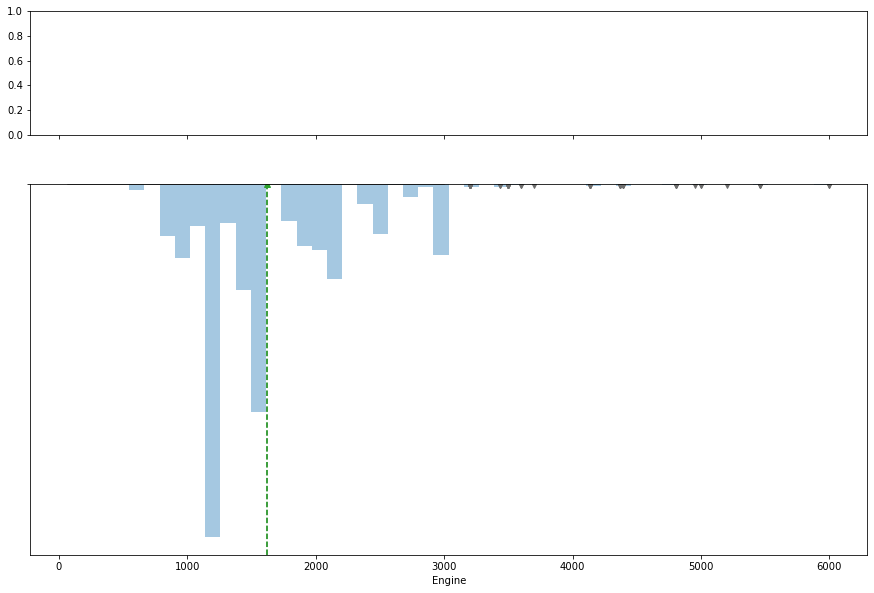

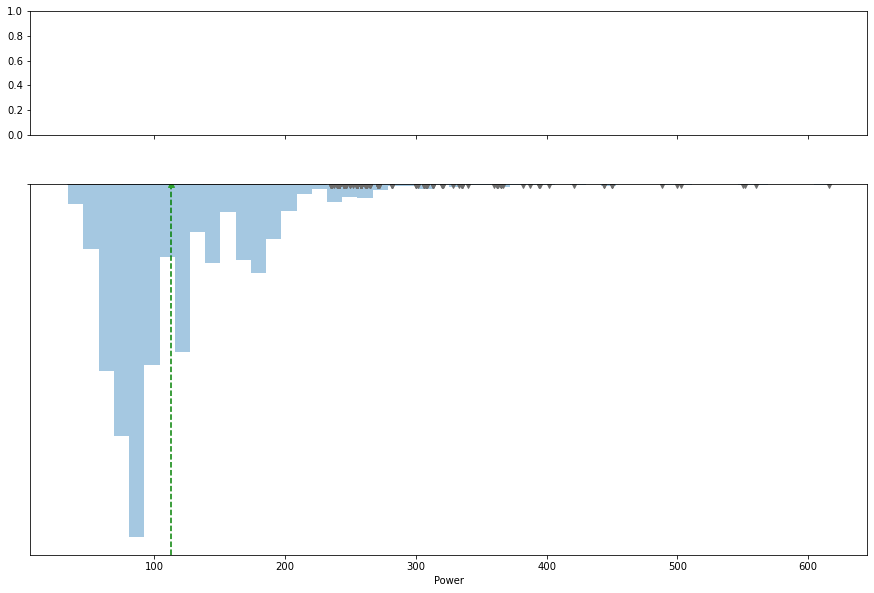

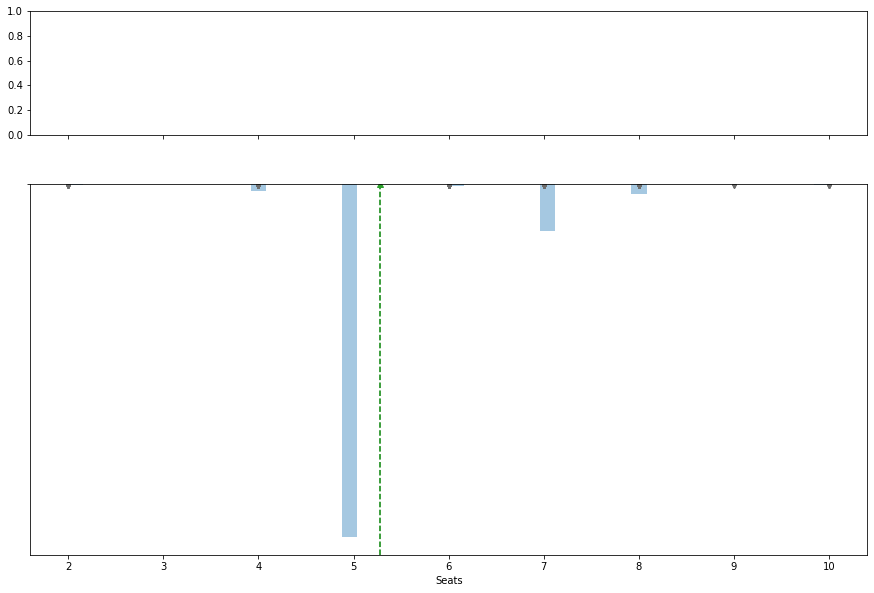

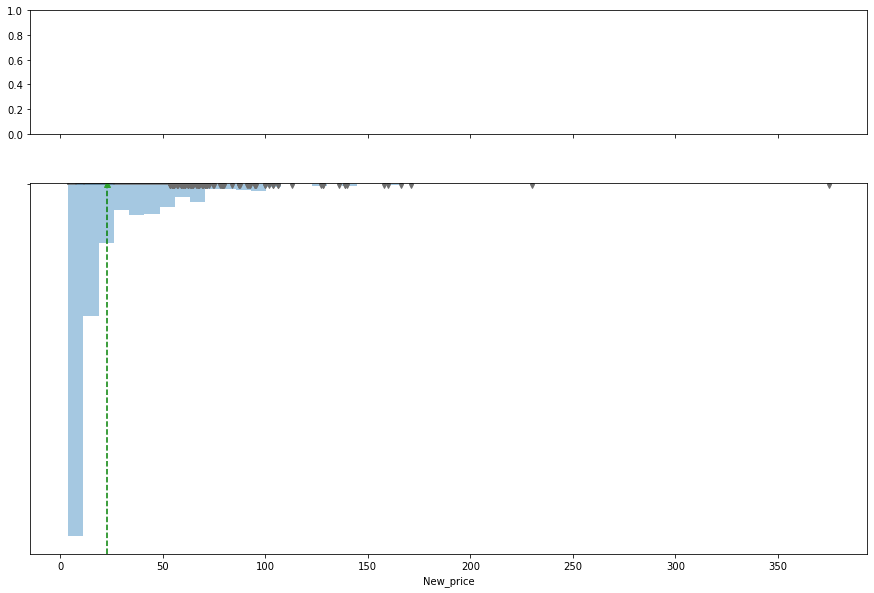

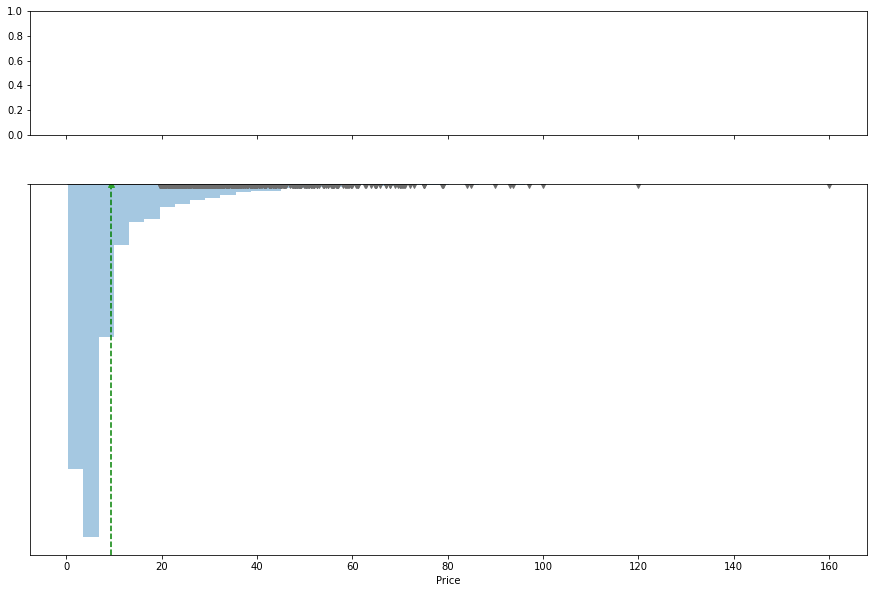

In [11]:
intcols = data.select_dtypes(exclude = ['object']).columns

for i in intcols:
    histogram_boxplot_maker(data[i])
    print("skewness of "+ i + " is :",data[i].skew())

Observations:
Kilometers_Driven, Price Driven, and New Price are highly right-skewed. 
Engine, Power, and Seat driven are rightly skewed
Everthing is else is not that skewed

skewness of log_kilometer driven is : -1.3539415163105548


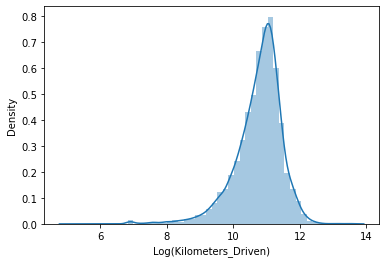

In [12]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");
print("skewness of log_kilometer driven is :",np.log(data["Kilometers_Driven"]).skew())

Observations and Insights: 

After log transformation on kilometers driven, the data seems to be normally distributed and hence can be used in our model for predictions

In [13]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

skewness of log price is: 1.205244817932507


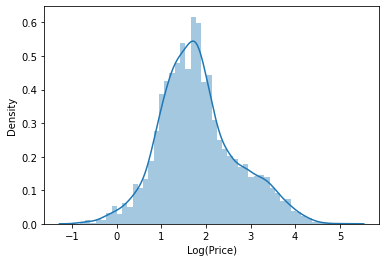

In [14]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");
print("skewness of log price is:", np.log(data["Price"].skew()))

Observations and Insights: 

After log transformation on Price driven now the data seems to be normally distributed and hence can be used in our model for predictions.

In [15]:
# We can Add a transformed Price feature in data
data["Price_log"] = np.log(data["Price"])

skewness of Log_Engine is 0.30076700325046135


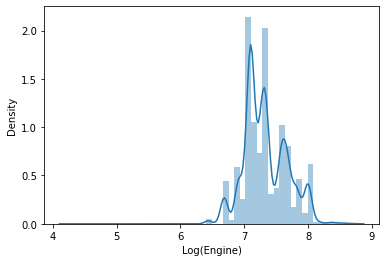

In [16]:
#making log transformation on variable Engine and checking skewness
sns.distplot(np.log(data["Engine"]), axlabel = "Log(Engine)");
print("skewness of Log_Engine is",np.log(data["Engine"]).skew())

skewness of Log_Power is 0.4443657782789483


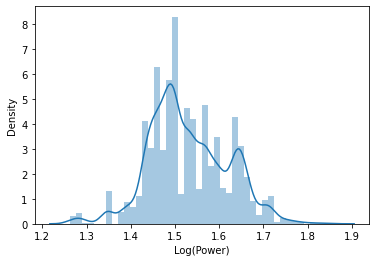

In [17]:
#plotting distribution graph for log transformation of Power
sns.distplot(np.log(np.log(data["Power"])), axlabel = "Log(Power)");
#checking skewness
print("skewness of Log_Power is",np.log(data['Power']).skew())

Observations and Insights for the plots

Kilometers driven and price were right skewed so we  applied log transformation to them 
which reduced it's skewness

Mileage seems to be normally distributed
, 
Engine and power is little skewed, after applyng log transformation skewness is reduced, but we didn't add it to the data set


In [18]:
##Making percent bar graphs for the Categorical variables
def percbar(c):

    total = len(data[c]) # Length of the column
    
    plt.figure(figsize = (20, 10))
    
    a = sns.countplot(data[c], palette = 'Paired', order = data[c].value_counts().index)
    
    for p in a.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) 
        
        x = p.get_x() + p.get_width() / 2 - 0.05 
        
        y = p.get_y() + p.get_height()         
        
        a.annotate(percentage, (x, y), size = 12) 
    
    plt.show() 

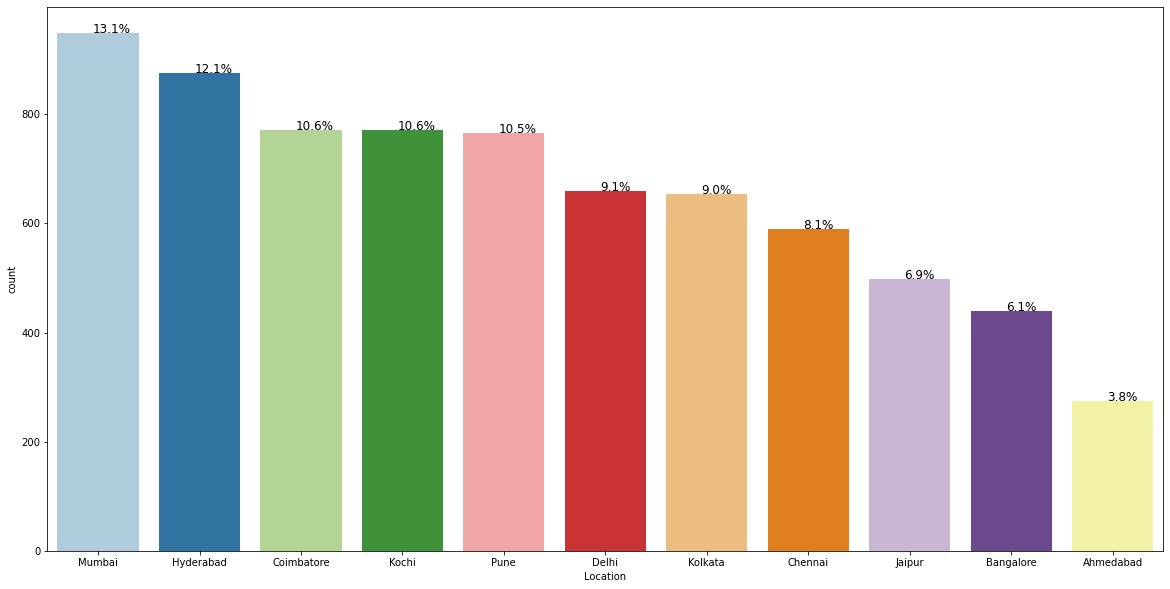

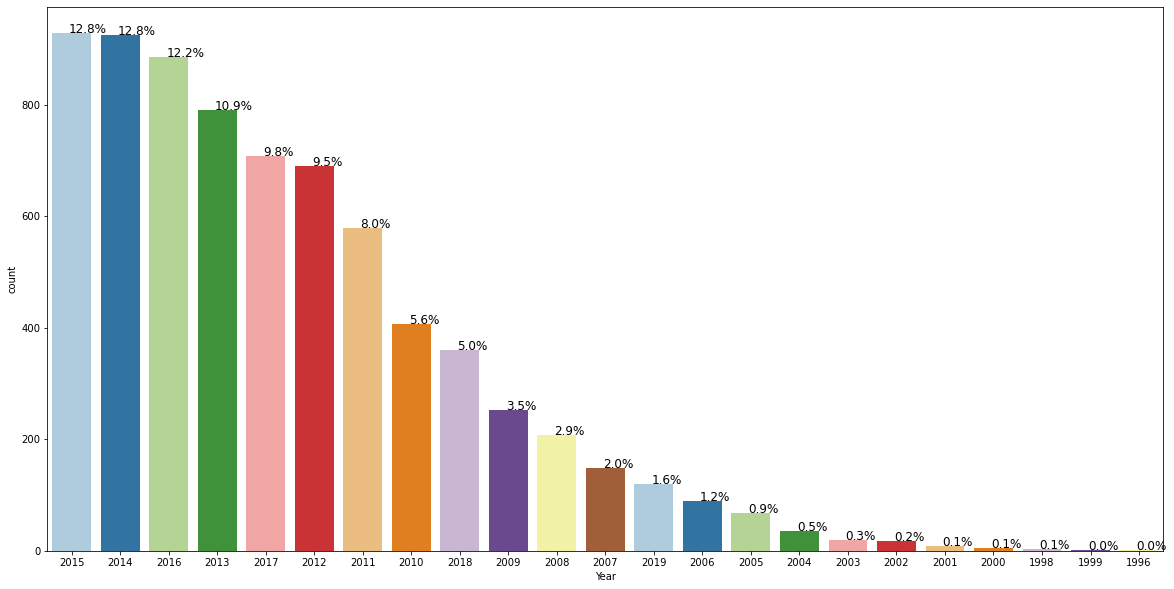

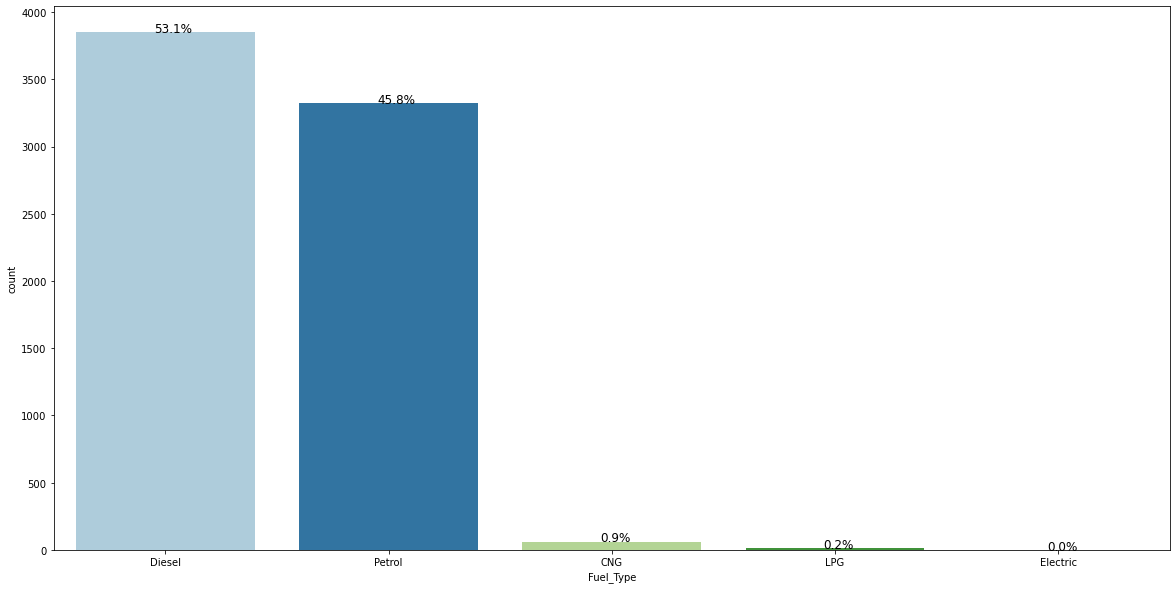

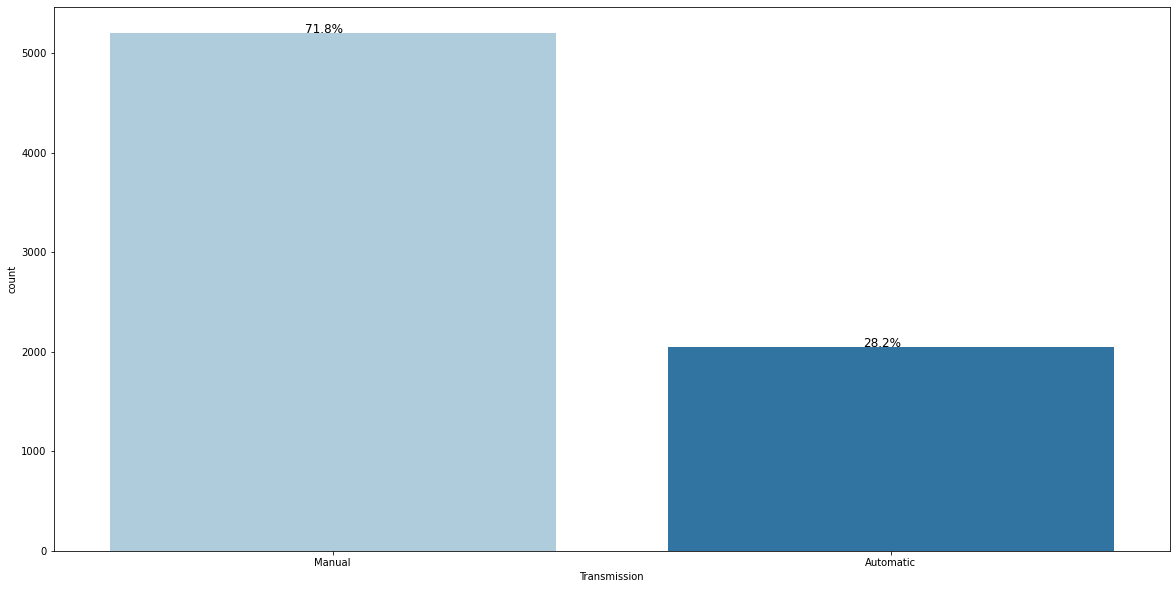

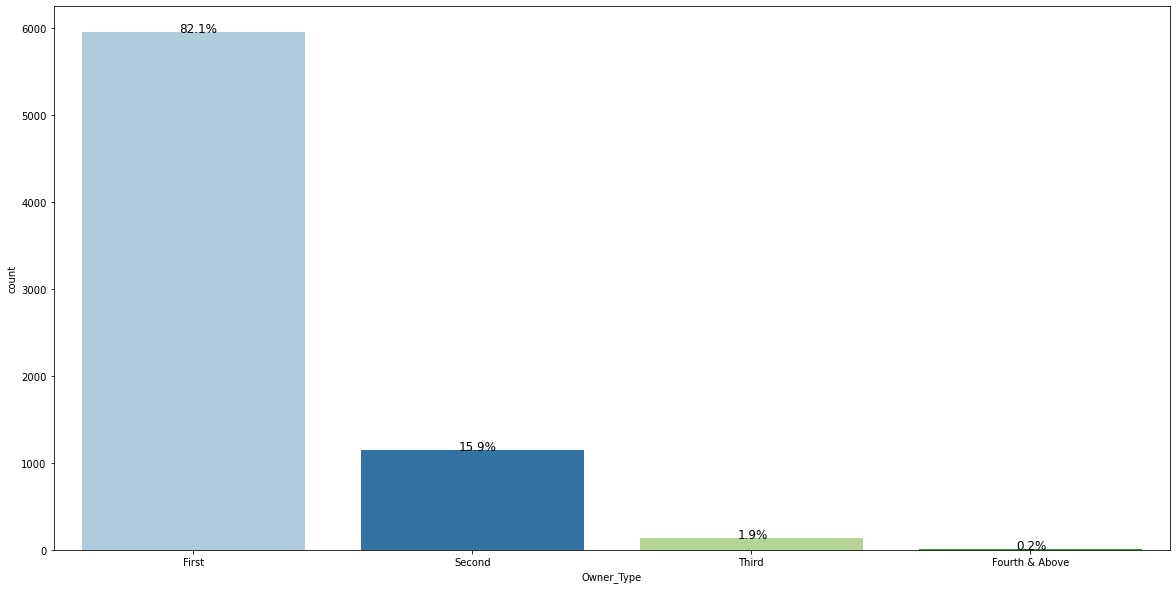

In [19]:
percbar('Location')
percbar('Year')
percbar('Fuel_Type')
percbar('Transmission')
percbar('Owner_Type')


Observations and Insights from plots:

Location plot has 11 cities with Mumbai having most share of cars and Ahmedabad the least.

Year built for car ranges from 1996 to 2015, cars built in 2004 or before have neligible share of cars

Fuel type shows that diesel and petrol are the two big players. CNG and LPG have little share while electric is at zero.

Transmission shows that manual is still the prefered type with a huge share at 71.8%

Owner type has first owner at 82.1% share and second at 15.9%

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

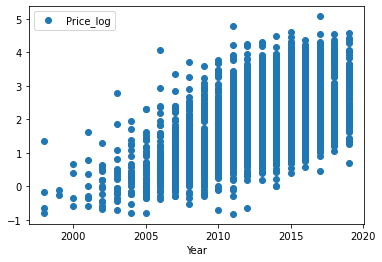

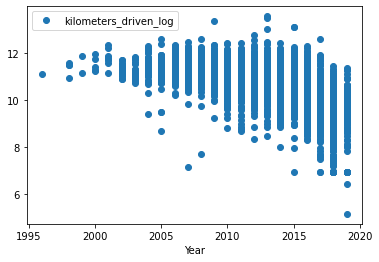

In [20]:
 ##plot pair plot for the variables 'year' and 'price_log'
data.plot(y = 'Price_log', x = 'Year', style = 'o');

#plot pair plot for the variables 'year' and 'kilometer_driven_log'
data.plot(y = 'kilometers_driven_log', x = 'Year', style = 'o');

Observations and Insights from plots:

It looks the new the car the more expensive it is, while the opposite is the case for 

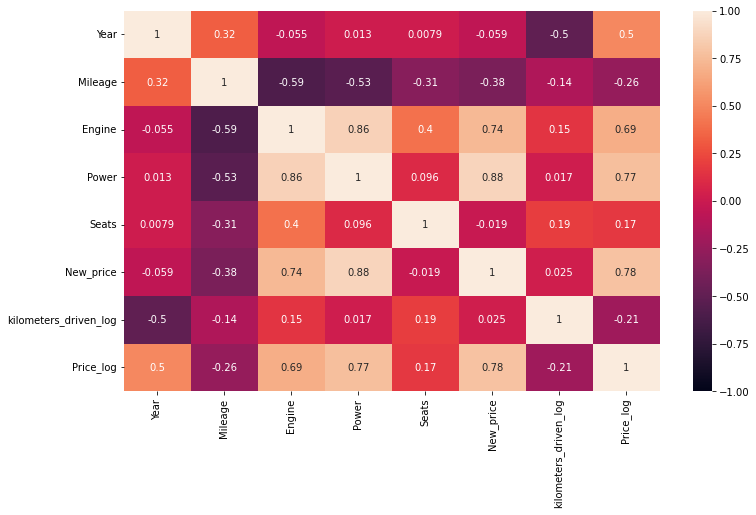

In [21]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven','Price', 'S.No.'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

Observations and Insights from plots:

Engine, Power, Price look like the are positvely corrolated while it is the opposite with km driven and mileage. The mileage won is surprising. 

Year is positive with the price which make sense since newer used car on average more expensive 

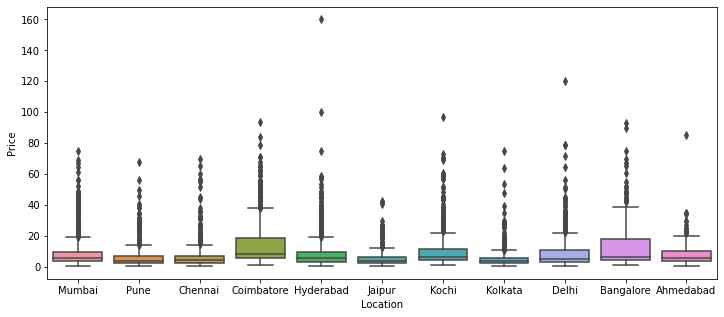

In [22]:
plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
sns.boxplot(x = data['Location'], y = data['Price']) # Defining x and y
    
plt.show()
    

Observations and Insights from plots:
 
 Coimbatore and Banglore have the most expensive cars while rest other cities are pretty much similar. 
 
 Every city has huge number of outliers. Could be exotic cars.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [23]:
## copy the data
data1 = data


In [24]:
#Adding new colum with only brand name
data1['Brand'] = data1['Name'].str.split(' ').str[0] #Separating Brand name from the Name
data1['Model'] = data1['Name'].str.split(' ').str[1] + data1['Name'].str.split(' ').str[2]
data1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4New


In [25]:
## See the brand names
data1['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [26]:
## there are two Isuzu, need to make it one IsUzu brand
data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'


In [27]:
data1['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [28]:
## see number of cars for each brand
data1.groupby('Brand').size().sort_values(ascending=False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

### **Missing value treatment**

In [29]:
## check for missing values
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       1
dtype: int64

In [30]:
#dropping null value in model since there is one
data1.dropna(subset=["Model"],axis=0,inplace=True)

In [31]:
##using median to fill in the null values for the fields below
data1['Seats'] = data1.groupby(['Model','Brand'])['Seats'].transform(lambda x: x.fillna(x.median()))


In [32]:
data1['Mileage'] = data1.Mileage.fillna(data1.Mileage.median())

In [33]:
data1['Engine'] = data1.Engine.fillna(data1.Engine.median())

In [34]:
data1['Power'] = data1.Power.fillna(data1.Power.median())

In [35]:
data1['New_price']=data1.groupby(['Name','Year'])['New_price'].apply(lambda x:x.fillna(x.median()))

In [36]:
##checking missing values again
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                      22
New_price                6137
Price                    1233
kilometers_driven_log       0
Price_log                1233
Brand                       0
Model                       0
dtype: int64

In [37]:
## changing null seat value to 5 because the is the median value 
data1.Seats=data1.Seats.fillna(5)

In [38]:
## check to see any nulls
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6137
Price                    1233
kilometers_driven_log       0
Price_log                1233
Brand                       0
Model                       0
dtype: int64

In [39]:
## get rid any entries with null values as those entries can not be filled in
data1.dropna(inplace=True,axis=0)

In [40]:
data1.groupby('Brand').size().sort_values(ascending=False)

Brand
Maruti           248
Hyundai           97
Toyota            82
BMW               70
Honda             68
Volkswagen        59
Mercedes-Benz     44
Tata              43
Renault           30
Mahindra          28
Audi              25
Ford              25
Skoda             20
Mini              16
Jeep              15
Nissan            15
Land              10
Datsun             7
Mitsubishi         6
Jaguar             4
Volvo              3
Porsche            1
Isuzu              1
Fiat               1
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

6/7 of the entires were dropped because of New Price being null. 

New Price, Engine, Year, and Power positvely affect Price 

Also seeme like Maruti, Hyundai, Toyota, and BMW are the most popular Brands when excluded the null values 



## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

We should drop Name as it is too variable and can't be split into easily defined catgories/values. So hard to make dummy variables

We should drop Price and Price log since those are values we are predicting

We should drop Kilometers_Driven because of its skewness and Kilometers_Driven_log value is better because of less skewed it is. 


In [41]:
##import libaries and copy data 
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data2=data1
carsData=data2

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [42]:
# Step-1 
X = carsData.drop(['Name','Price','Price_log','Kilometers_Driven','Model', 'S.No.'], axis = 1)
y = carsData[["Price_log", "Price"]]


In [43]:
# Step-2
X = pd.get_dummies(X, drop_first = True)

In [44]:
# Step-3
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(642, 46) (276, 46)


In [45]:
##A function for calculating r2_score and RMSE on train and test data

def get_model_score(model, flag = True):
  
    scorelist = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    scorelist.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(mean_squared_error(y_test['Price'], pred_test_)))
    
    return scorelist

In [46]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

# Get score of the model
LR_score = get_model_score(lr)

print(LR_score)

R-sqaure on training set :  0.9004483851056834
R-square on test set :  0.7837911725550225
RMSE on training set :  4.894580604596581
RMSE on test set :  5.1153135826694465
[0.9004483851056834, 0.7837911725550225, 4.894580604596581, 5.1153135826694465]


In [47]:
# Import Statsmodels 
import statsmodels.api as sm

#  add a constant to he model
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

## a fuction to biuld Ordinary least squares (OLS) regression model
def buildolsmodel(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], X_train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = buildolsmodel(X_train)

print(olsmodel1.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1018.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:26:47   Log-Likelihood:                         -71.022
No. Observations:                 642   AIC:                                      230.0
Df Residuals:                     598   BIC:                                      426.5
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [48]:
## get R2 and RMSE score for OLS Model
OLS_score = get_model_score(olsmodel1)

R-sqaure on training set :  0.851200945540197
R-square on test set :  0.6849979666477758
RMSE on training set :  5.9839976729719115
RMSE on test set :  6.174364015517238


In [49]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso

# Create a Ridge regression model
ridge = Ridge(alpha=1.0)


# Fit Ridge regression model
ridge.fit(X_train,y_train['Price_log'])

# Get score of the model
ridge_score = get_model_score(ridge)

R-sqaure on training set :  0.9019574111763893
R-square on test set :  0.8294528383408648
RMSE on training set :  4.8573423650591465
RMSE on test set :  4.543157568835017


In [50]:
#create lasso regression model 
lasso=Lasso(alpha=1.0)

#Fit Lasso regression model
lasso.fit(X_train,y_train['Price_log'])

# Get score of the model
lasso_score = get_model_score(lasso)

R-sqaure on training set :  0.17772445259821978
R-square on test set :  -0.1137995412647006
RMSE on training set :  14.066952402994943
RMSE on test set :  11.610183099980757


In [51]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor 

# Create a decision tree regression model, use random_state = 1
dtree =DecisionTreeRegressor(random_state = 1) 

# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.8958220167723557
RMSE on training set :  4.045389662000899e-15
RMSE on test set :  3.5507780327248226


In [52]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
New_price              8.451562e-01
Year                   8.839760e-02
kilometers_driven_log  2.153736e-02
Brand_Porsche          2.073567e-02
Mileage                8.232371e-03
Power                  3.503884e-03
Location_Kolkata       1.541065e-03
Fuel_Type_Petrol       1.426526e-03
Engine                 1.241194e-03
Location_Coimbatore    1.142132e-03
Location_Mumbai        1.076242e-03
Brand_Tata             1.046953e-03
Brand_Honda            6.720273e-04
Brand_Volkswagen       6.548652e-04
Location_Kochi         5.865237e-04
Location_Hyderabad     5.333191e-04
Location_Delhi         3.983203e-04
Location_Bangalore     3.033512e-04
Owner_Type_Third       3.025401e-04
Fuel_Type_Diesel       2.609522e-04
Brand_Maruti           1.734490e-04
Brand_Renault          1.505975e-04
Brand_Toyota           1.396594e-04
Seats                  1.304410e-04
Location_Jaipur        1.207505e-04
Brand_BMW              1.135859e-04
Location_Pune          1.112

In [53]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create a Randomforest regression model 
clf = RandomForestRegressor(n_estimators=100)

# Fit Randomforest regression model
clf.fit(X_train, y_train['Price_log'])

# Get score of the model
clf_model = get_model_score(clf)

R-sqaure on training set :  0.9801430338285472
R-square on test set :  0.95970619997036
RMSE on training set :  2.185988023309085
RMSE on test set :  2.2082826735795145


In [54]:
# Print important features similar to decision trees
print(pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.840587
Year                   0.075890
kilometers_driven_log  0.025608
Brand_Porsche          0.019474
Power                  0.009413
Mileage                0.005878
Engine                 0.005805
Brand_BMW              0.001466
Owner_Type_Third       0.001356
Location_Kolkata       0.001275
Location_Delhi         0.001049
Fuel_Type_Diesel       0.001011
Location_Coimbatore    0.000986
Brand_Hyundai          0.000887
Location_Mumbai        0.000887
Fuel_Type_Petrol       0.000825
Brand_Tata             0.000672
Location_Pune          0.000648
Brand_Honda            0.000626
Location_Hyderabad     0.000597
Brand_Volkswagen       0.000557
Location_Kochi         0.000535
Location_Bangalore     0.000518
Owner_Type_Second      0.000475
Seats                  0.000455
Transmission_Manual    0.000415
Location_Chennai       0.000384
Location_Jaipur        0.000272
Brand_Mahindra         0.000259
Brand_Maruti           0.000189
Brand_To

### **Hyperparameter Tuning: Decision Tree**

In [55]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Choose the type of estimator 
dt_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
params = { 'splitter':["best","random"],
    'max_depth': [1, 3, 5, 7, 9, 11, 12, 15],
    'min_samples_leaf': [5, 10, 20, 25]
    }

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
gridobj = GridSearchCV(estimator=dt_tuned,param_grid=params,
                        cv=10, verbose=1, scoring = scorer)
gridobj = gridobj.fit(X_train,y_train)

# Set the model to the best combination of parameters
dt_tuned = gridobj.best_estimator_

# Fit the best algorithm to the dataJ
dt_tuned.fit(X_train,y_train['Price_log'])

# Get score of the dtree_tuned
dt_model_tuned = get_model_score(dt_tuned)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
R-sqaure on training set :  0.8579445355022013
R-square on test set :  0.8803571014419125
RMSE on training set :  5.846827789847875
RMSE on test set :  3.8052133748299277


**Feature Importance**

In [56]:
print(pd.DataFrame(dt_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.901360
Year                   0.086248
kilometers_driven_log  0.005300
Power                  0.003964
Mileage                0.002865
Engine                 0.000180
Brand_Maruti           0.000083
Brand_Mercedes-Benz    0.000000
Brand_Hyundai          0.000000
Brand_Isuzu            0.000000
Brand_Jaguar           0.000000
Brand_Jeep             0.000000
Brand_Land             0.000000
Brand_Mahindra         0.000000
Brand_Nissan           0.000000
Brand_Mini             0.000000
Brand_Mitsubishi       0.000000
Brand_Ford             0.000000
Brand_Porsche          0.000000
Brand_Renault          0.000000
Brand_Skoda            0.000000
Brand_Tata             0.000000
Brand_Toyota           0.000000
Brand_Volkswagen       0.000000
Brand_Honda            0.000000
Brand_BMW              0.000000
Brand_Fiat             0.000000
Brand_Datsun           0.000000
Seats                  0.000000
Location_Bangalore     0.000000
Location

### **Hyperparameter Tuning: Random Forest**

In [57]:
# Choose the type of Regressor
rf_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those
params={'max_depth': [1, 2, 3, 5, 7, 9, 10, 11, 12],
    'min_samples_leaf': [5, 10, 20, 25]
  }

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'
# Run the grid search
gridobj = GridSearchCV(estimator=rf_tuned,param_grid=params,
                        cv=10, verbose=1, scoring = scorer)
gridobj = gridobj.fit(X_train,y_train)

# Set the model to the best combination of parameters
rf_tuned=gridobj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train,y_train['Price_log'])

Fitting 10 folds for each of 36 candidates, totalling 360 fits


RandomForestRegressor(max_depth=10, min_samples_leaf=5, random_state=1)

In [58]:
# Get score of the model
rf_model_tuned = get_model_score(rf_tuned)

R-sqaure on training set :  0.8942599957897435
R-square on test set :  0.9368377503272173
RMSE on training set :  5.044417131006662
RMSE on test set :  2.7648039837771434


**Feature Importance**

In [59]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
New_price              0.866859
Year                   0.074252
Power                  0.021444
kilometers_driven_log  0.019574
Mileage                0.005832
Engine                 0.003605
Brand_Mercedes-Benz    0.002322
Brand_BMW              0.001020
Location_Kochi         0.000924
Brand_Land             0.000689
Location_Kolkata       0.000556
Fuel_Type_Petrol       0.000454
Brand_Maruti           0.000385
Brand_Tata             0.000323
Seats                  0.000284
Fuel_Type_Diesel       0.000266
Brand_Volkswagen       0.000223
Location_Coimbatore    0.000217
Location_Mumbai        0.000125
Brand_Hyundai          0.000113
Location_Bangalore     0.000105
Location_Pune          0.000076
Transmission_Manual    0.000076
Brand_Honda            0.000065
Owner_Type_Second      0.000050
Brand_Mahindra         0.000033
Location_Delhi         0.000033
Brand_Renault          0.000024
Location_Chennai       0.000022
Brand_Mini             0.000021
Brand_To

In [60]:
models = [lr, olsmodel1, ridge, lasso, dtree,clf, dt_tuned, rf_tuned ]

# Defining empty lists to add train and test results
r2train = []
r2test = []
rmsetrain = []
rmsetest = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2train.append(j[0])
    
    r2test.append(j[1])
    
    rmsetrain.append(j[2])
    
    rmsetest.append(j[3])

In [61]:
##Made a comparsion frame to show all the scores of the model
comparisonframe = pd.DataFrame({'Model':['Linear Regression', 'OLS model','Ridge','Lasso','Decision Tree','Random forest','Tuned Decision Tree','Tuned Random forest'], 
                                          'Train_r2': r2train,'Test_r2': r2test,
                                          'Train_RMSE': rmsetrain,'Test_RMSE': rmsetest}) 
comparisonframe

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.900448,0.783791,4.894581e+00,5.115314
1,OLS model,0.851201,0.684998,5.983998e+00,6.174364
2,Ridge,0.901957,0.829453,4.857342e+00,4.543158
3,Lasso,0.177724,-0.113800,1.406695e+01,11.610183
4,Decision Tree,1.000000,0.895822,4.045390e-15,3.550778
5,Random forest,0.980143,0.959706,2.185988e+00,2.208283
6,Tuned Decision Tree,0.857945,0.880357,5.846828e+00,3.805213
7,Tuned Random forest,0.894260,0.936838,5.044417e+00,2.764804


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

The Regressions models look like their are overfitting based on their r2 and RMSE values with Train_r2 being much higher than test_r2. OLS Regression is not a good model based the test r-squared values likewise with Lasso Regression which was negative The Decision Tree looks like it overfits as well based on the r-squared values. The random forest test and training r-squared vales are very similar likewise with the RMSE_score. 

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?
That New Price is the most significant factor in determining price based on the better models with 80% of the share. kilometers_driven_log, and if the Brand is Porsche also has little effect on price. While the other field have not any effect on the price at all. 

So it seem like New Price deteremines the used car price the most which makes sense due to expensive new cars becoming expensive used cars.  


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

Based on the the scores, the random forest model is the best model to adopt because how similar the R2 and RSME values are. So, there is not much overfitting or underfitting. Therefore, one can use this random forest model on similar used cars with unknown prices and get similar values as the used cars with known prices. A risk with the model is that a lot of the data was dropped due to missing values because most of the cars did not have new prices. So a challenge would be seeing would this model work the best with a more full data set. The benefit of the solution is that it is easy to how important the features are and it makes sense since a seller of a used car will based the price on a depreciated value when the car was bought new. Maybe add some deep learning models or get data set with less values can help Cars4u get a better price predictor model. That could be a cost finding the new prices of the car and time spent fine tuning models. 